In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/online+shoppers+purchasing+intention+dataset/online_shoppers_intention.csv')

In [ ]:
# Display the first 5 rows of the dataset
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# Check and display data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
# Check data statistics
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Check for missing values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Pre-Processing


1. Mengubah variable menjadi numerik

In [ ]:
# Convert categorical variables to numerical format

categorical_cols = ['Month', 'VisitorType', 'Weekend', 'Revenue']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


# Feature engineering: Create new features
data['Total_Duration'] = data['Administrative_Duration'] + data['Informational_Duration'] + data['ProductRelated_Duration']

# Display the first few rows of the dataframe after encoding and feature engineering
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Total_Duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0,627.500000


2. visualisasi proporsi label untuk memeriksa imbalance

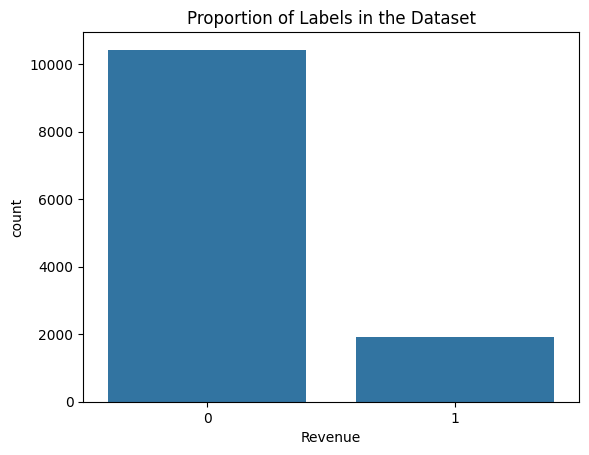

In [ ]:
# Visualize the proportion of labels in the dataset
sns.countplot(x='Revenue', data=data)
plt.title('Proportion of Labels in the Dataset')
plt.show()

3. menyeimbangkan dataset menggunakan SMOTE

In [ ]:
# Separate features and target variable
X = data.drop('Revenue', axis=1)
y = data['Revenue']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the new class distribution
print(pd.Series(y_resampled).value_counts())

Revenue
0    10422
1    10422
Name: count, dtype: int64


4. menggunakan Random Forest, Gradient Boosting, dan XGBoost sebagai model algoritma klasifikasi

In [ ]:
# Define and train models
rf = RandomForestClassifier(random_state=42, min_samples_leaf=5)
gb = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Define the parameter grids for the classifiers
param_grid_rf = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
param_grid_gb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
param_grid_xgb = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0],'colsample_bytree': [0.8, 1.0]}

# Perform Grid Search for hyperparameter tuning
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring=make_scorer(f1_score), n_jobs=-1)

# Fit the models
grid_search_rf.fit(X_train, y_train)
grid_search_gb.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Best scores
print(f"Best Random Forest F1-Score: {grid_search_rf.best_score_}")
print(f"Best Gradient Boosting F1-Score: {grid_search_gb.best_score_}")
print(f"Best XGBoost F1-Score: {grid_search_xgb.best_score_}")

# Best estimators
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_
best_xgb = grid_search_xgb.best_estimator_

Best Random Forest F1-Score: 0.92846658879287
Best Gradient Boosting F1-Score: 0.9314417962857346
Best XGBoost F1-Score: 0.932876755029263


5. Melakukan evaluasi model dengan K-Fold Cross Validation

In [ ]:
# Evaluate the best model using K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'XGBoost': best_xgb
}

results = {}

for model_name, model in models.items():
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv=kf, scoring=make_scorer(f1_score))
    results[model_name] = cv_results.mean()
    print(f"{model_name} F1-Score (K-Fold): {results[model_name]:.4f}")

# Select the best performing model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with F1-Score: {results[best_model_name]:.4f}")

Random Forest F1-Score (K-Fold): 0.9336
Gradient Boosting F1-Score (K-Fold): 0.9352
XGBoost F1-Score (K-Fold): 0.9365

Best Model: XGBoost with F1-Score: 0.9365


6. visualisasi confusion matrix dari model dengan performa terbaik

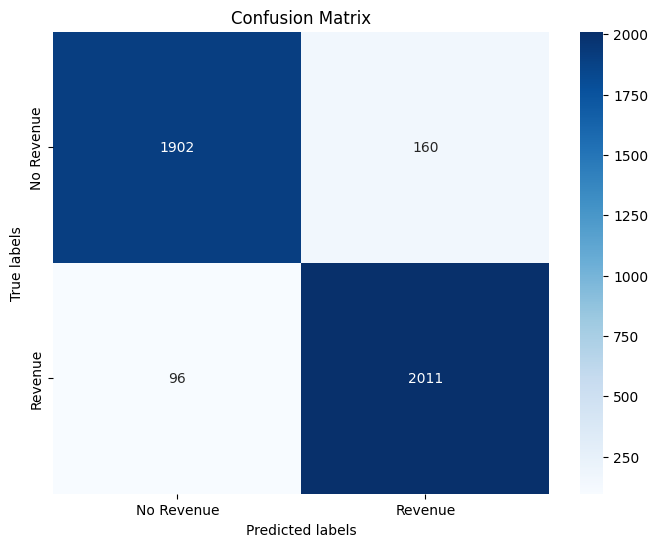

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set using the best model
y_pred = best_model.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Revenue", "Revenue"], yticklabels=["No Revenue", "Revenue"])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
